# <p style="background-color:#28e7ed; font-family:newtimeroman; color:#37537d; font-size:175%; text-align:center; border-radius:10px 10px;">DBSCAN Hyperparameters</p>


<div class="alert alert-block alert-info alert">

### <span style=" color:#bf2e98">Two important Hyperparameters in DBSCAN

**Epsilon:**
* Increasing epsilon allows more points to be **core** points which also results in more **border** points and less outlier points.
* Imagine a huge epsilon, all points would be within the neighborhood and cliassified as the same cluster.
* Decreasing epsilon causes more points not to be in range of each other, creating more unique clusters.
* One method to find is to use **elbow/knee diagram** comparing epsilon values.
* Finding an epsilon value is extremely dependent on the particular dataset and domain knowledge.

**Minimum number of samples/points:**
* Number of samples in a neighborhood for a point to be considered as a core point(including the point itself).
* Increasing to a larger number of samples needed to be considered a core point, causes more points to be considered unique outliers.
* Imagine if minimum number if samples was close to total number of points available, then very likely all points would become outliers.
* Solution: Test multiple potential values and chart against number of outliers labeled.
* Useful to increase to create potential new small clusters, instead of complete outliers.
</div>

## DBSCAN and Clustering Examples

Let's explore the hyperparameters for DBSCAN and how they can change results!

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
two_blobs = pd.read_csv('cluster_two_blobs.csv')
two_blobs_outliers = pd.read_csv('cluster_two_blobs_outliers.csv')

<Axes: xlabel='X1', ylabel='X2'>

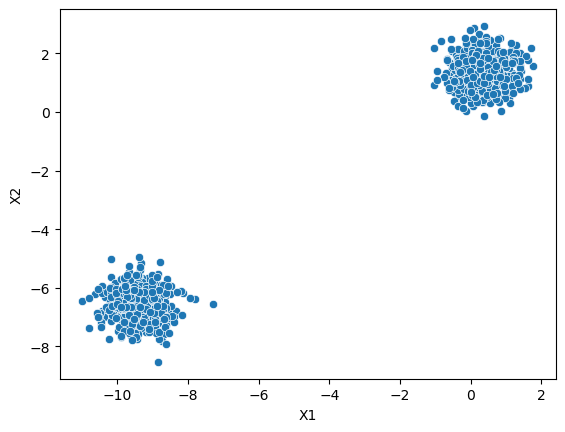

In [3]:
sns.scatterplot(data=two_blobs,x='X1',y='X2')

<Axes: xlabel='X1', ylabel='X2'>

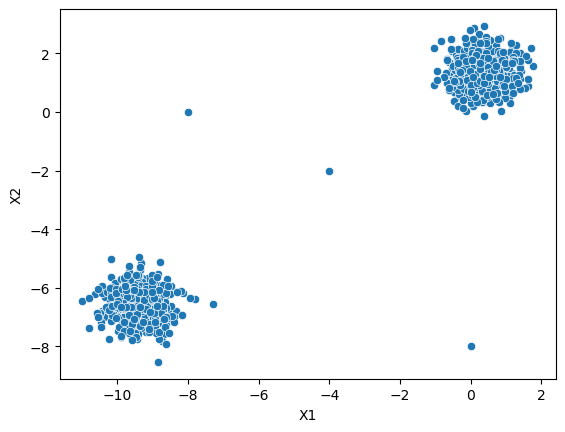

In [4]:
# plt.figure(figsize=(10,6),dpi=200)
sns.scatterplot(data=two_blobs_outliers,x='X1',y='X2')

## Label Discovery

In [5]:
def display_categories(model,data):
    labels = model.fit_predict(data)
    sns.scatterplot(data=data,x='X1',y='X2',hue=labels,palette='Set1')

## DBSCAN

In [6]:
from sklearn.cluster import DBSCAN

In [7]:
# help(DBSCAN)

# default values
#  DBSCAN(eps=0.5, *, min_samples=5, metric='euclidean', metric_params=None, algorithm='auto', leaf_size=30, p=None, n_jobs=None)

In [8]:
# DBSCAN model with default values
dbscan = DBSCAN()

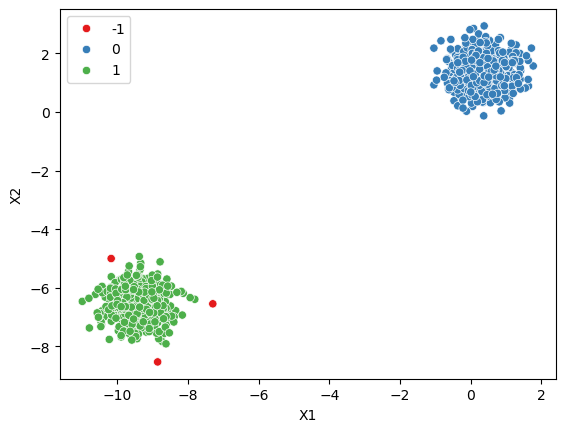

In [9]:
display_categories(dbscan,two_blobs)

The model with default values detects some points close to one cluster as the outlier points.

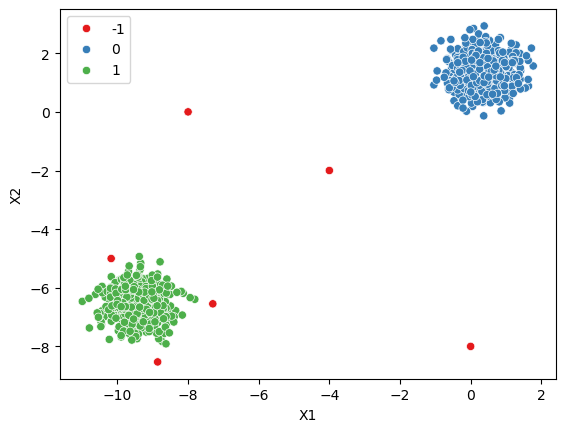

In [10]:
display_categories(dbscan,two_blobs_outliers)

# Epsilon

    eps : float, default=0.5
           The maximum distance between two samples for one to be considered
           as in the neighborhood of the other. This is not a maximum bound
           on the distances of points within a cluster. This is the most
           important DBSCAN parameter to choose appropriately for your data set
           and distance function.

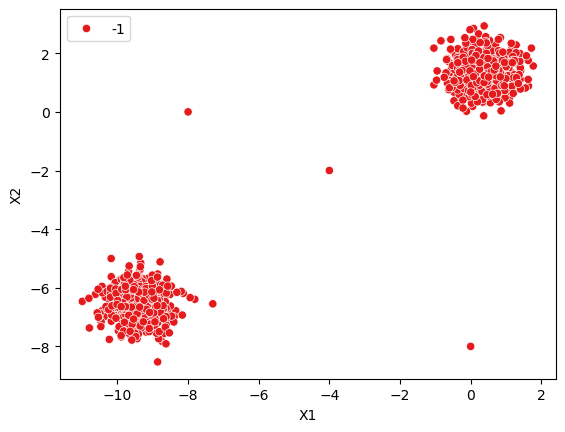

In [11]:
# Tiny Epsilon --> Tiny Max Distance --> Everything is an outlier (class=-1)
dbscan = DBSCAN(eps=0.001)
display_categories(dbscan,two_blobs_outliers)

When we use low epsilon value (0,001), it considers every point as outliers ("-1" represents outliers).

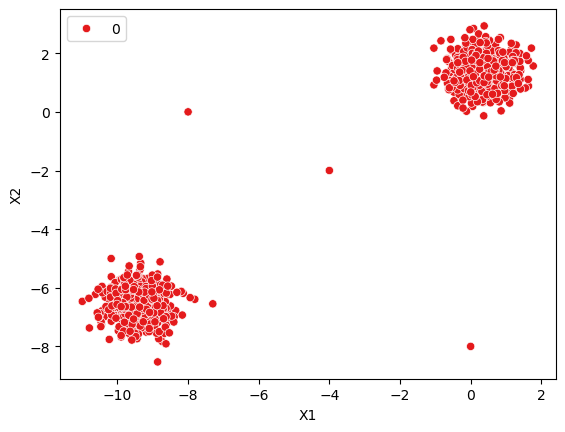

In [12]:
# Huge Epsilon --> Huge Max Distance --> Everything is in the same cluster (class=0)
dbscan = DBSCAN(eps=10)
display_categories(dbscan,two_blobs_outliers)

On the other hand, when we determine an epsilon, which is too high (10), it considers all points one cluster (here, 0 represents a cluster).

**How to find a good epsilon?**

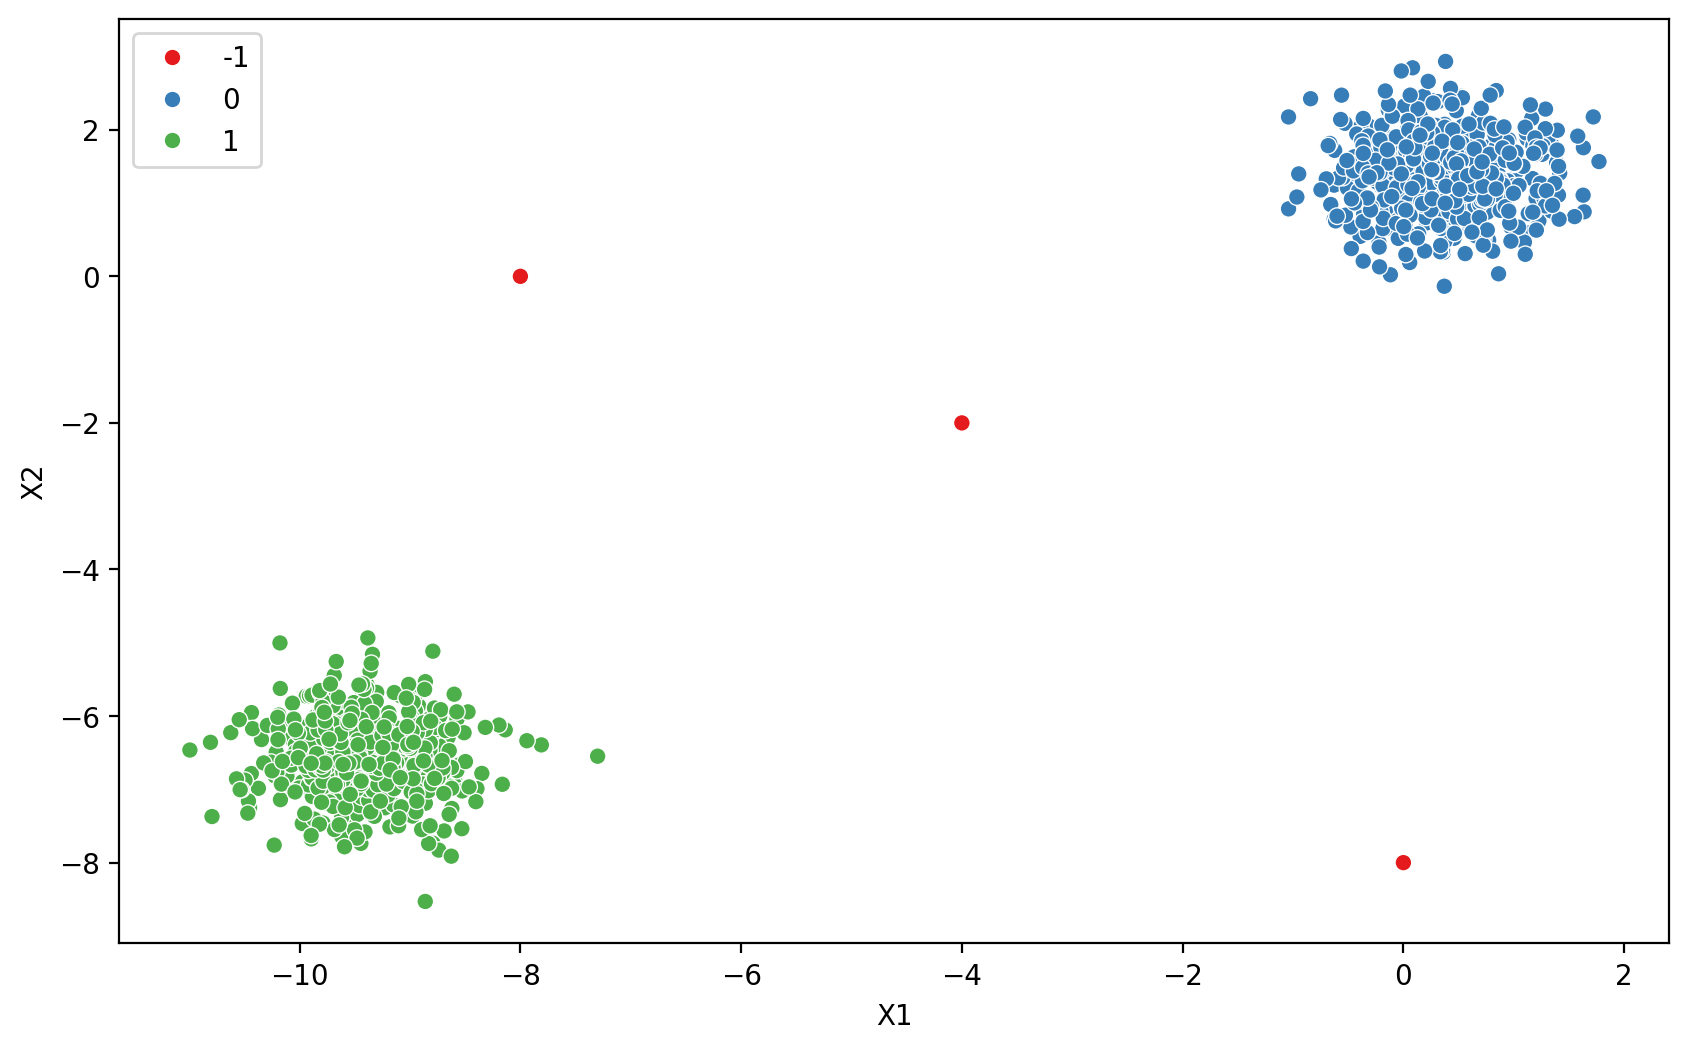

In [13]:
# Desired clustering
plt.figure(figsize=(10,6),dpi=200)
dbscan = DBSCAN(eps=1)
display_categories(dbscan,two_blobs_outliers)

In [14]:
dbscan.labels_

array([ 0,  1,  0, ..., -1, -1, -1], dtype=int64)

In [15]:
# number of unique outliers, including outliers as one group
len(np.unique(dbscan.labels_))

3

In [16]:
# Label "-1" means outliers
dbscan.labels_ == -1

array([False, False, False, ...,  True,  True,  True])

In [17]:
# How many outliers?

np.sum(dbscan.labels_ == -1)

3

In [18]:
# Outliers in terms of percentage
100 * np.sum(dbscan.labels_ == -1) / len(dbscan.labels_)

0.29910269192422734

In [19]:
len(dbscan.labels_)

1003

## Charting reasonable Epsilon values

In [20]:
# bend the knee! https://raghavan.usc.edu/papers/kneedle-simplex11.pdf

In [21]:
# np.arange(start=0.01,stop=10,step=0.01)

In [22]:
outlier_percent = []
number_of_outliers = []

for eps in np.linspace(0.001,10,100):
    
    # Create Model
    dbscan = DBSCAN(eps=eps)
    dbscan.fit(two_blobs_outliers)
    
    # Log Number of Outliers
    number_of_outliers.append(np.sum(dbscan.labels_ == -1))
    
    # percentage of points that are outliers
    perc_outliers = 100 * np.sum(dbscan.labels_ == -1) / len(dbscan.labels_)
    
    outlier_percent.append(perc_outliers)
    

Text(0.5, 0, 'Epsilon Value')

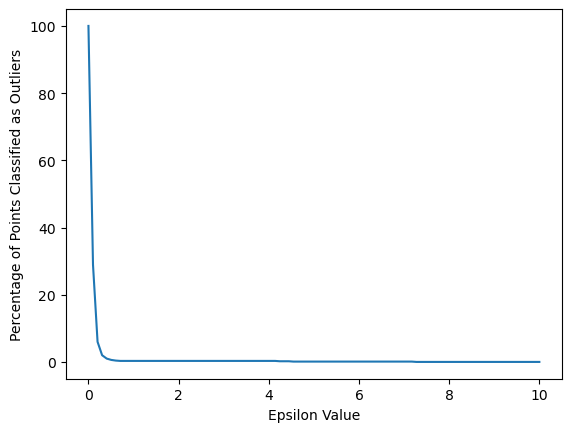

In [23]:
sns.lineplot(x=np.linspace(0.001,10,100), y=outlier_percent)
plt.ylabel("Percentage of Points Classified as Outliers")
plt.xlabel("Epsilon Value")

After a point, to increase epsilon does not help to find true number of clusters as we saw abowe when we used 10 for epsilon.

(0.0, 1.0)

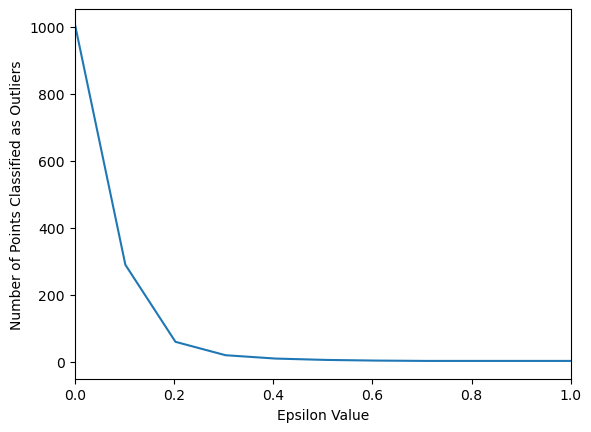

In [24]:
# Let's zoom in to see the exact value (the threshold)

sns.lineplot(x=np.linspace(0.001,10,100),y=number_of_outliers)
plt.ylabel("Number of Points Classified as Outliers")
plt.xlabel("Epsilon Value")
plt.xlim(0,1)

### Do we want to think in terms of percentage targeting instead?

If so, you could "target" a percentage, like choose a range producing 1%-5% as outliers.

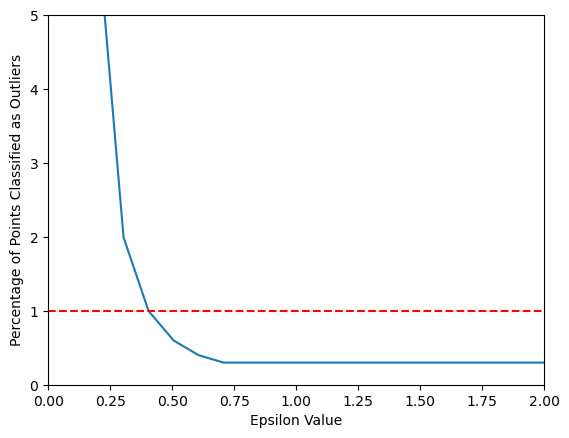

In [25]:
sns.lineplot(x=np.linspace(0.001,10,100),y=outlier_percent)
plt.ylabel("Percentage of Points Classified as Outliers")
plt.xlabel("Epsilon Value")
plt.ylim(0,5)
plt.xlim(0,2)
plt.hlines(y=1,xmin=0,xmax=2,colors='red',ls='--') # y is the precentage of outliers

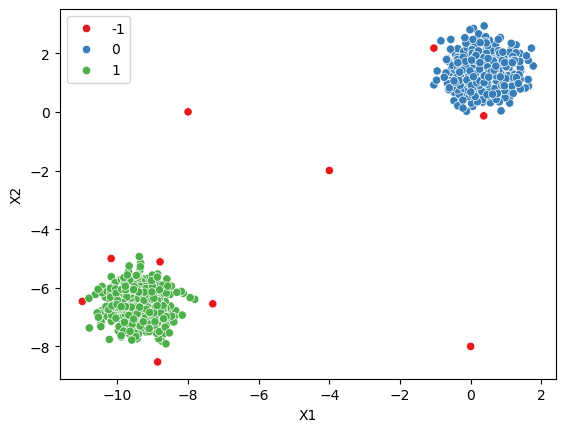

In [26]:
# How to find a good epsilon?
dbscan = DBSCAN(eps=0.4)
display_categories(dbscan,two_blobs_outliers)

### Do we want to think in terms of number of outliers targeting instead?

If so, you could "target" a number of outliers, such as 3 points as outliers.

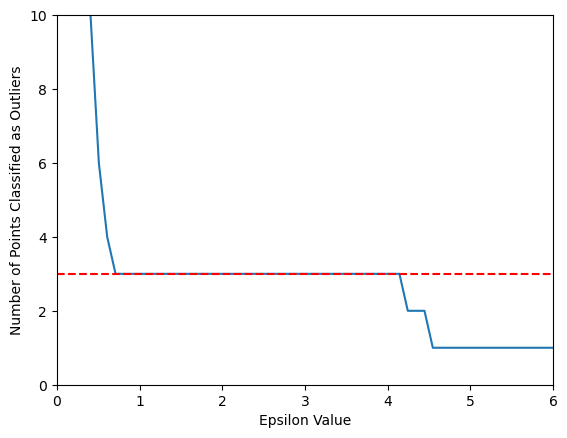

In [27]:
sns.lineplot(x=np.linspace(0.001,10,100),y=number_of_outliers)
plt.ylabel("Number of Points Classified as Outliers")
plt.xlabel("Epsilon Value")
plt.ylim(0,10)
plt.xlim(0,6)
plt.hlines(y=3,xmin=0,xmax=10,colors='red',ls='--')

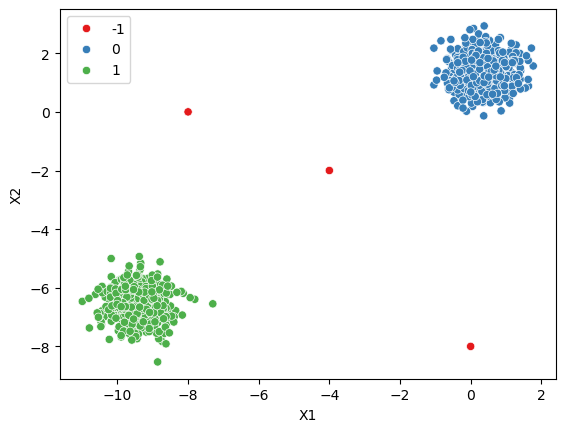

In [28]:
# How to find a good epsilon?
dbscan = DBSCAN(eps=0.75)
display_categories(dbscan,two_blobs_outliers)

## Minimum Samples

       min_samples : int, default=5
           The number of samples (or total weight) in a neighborhood for a point
           to be considered as a core point. This includes the point itself.
     

How to choose minimum number of points?

https://stats.stackexchange.com/questions/88872/a-routine-to-choose-eps-and-minpts-for-dbscan

In [29]:
outlier_percent = []

for n in np.arange(1,100):
    
    # Create Model
    dbscan = DBSCAN(min_samples=n)
    dbscan.fit(two_blobs_outliers)
    
    # Log percentage of points that are outliers
    perc_outliers = 100 * np.sum(dbscan.labels_ == -1) / len(dbscan.labels_)
    
    outlier_percent.append(perc_outliers)
    

Text(0.5, 0, 'Minimum Number of Samples')

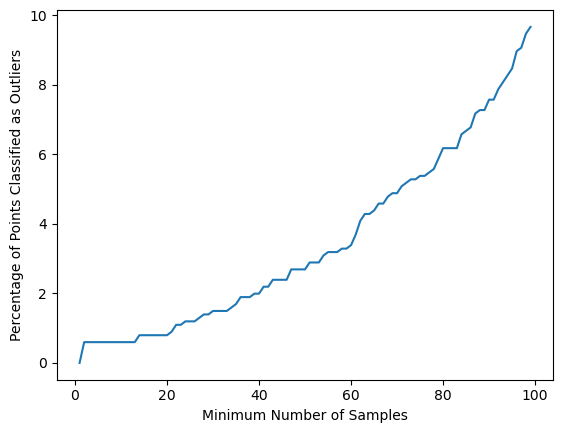

In [30]:
sns.lineplot(x=np.arange(1,100),y=outlier_percent)
plt.ylabel("Percentage of Points Classified as Outliers")
plt.xlabel("Minimum Number of Samples")

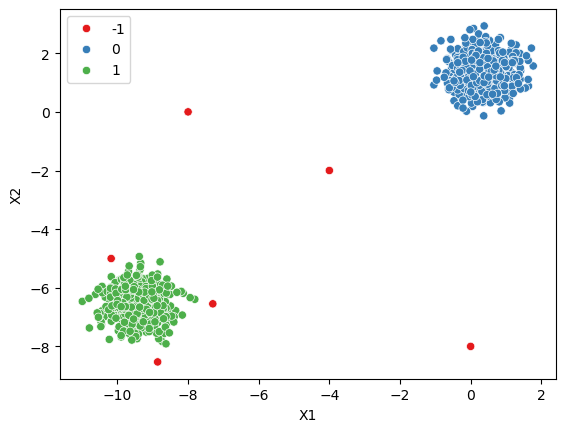

In [31]:
num_dim = two_blobs_outliers.shape[1] # number of dimensions

dbscan = DBSCAN(min_samples=2*num_dim)
display_categories(dbscan,two_blobs_outliers)

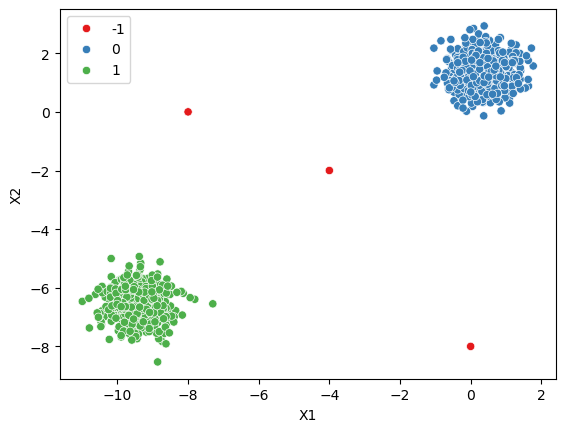

In [32]:
num_dim = two_blobs_outliers.shape[1]

dbscan = DBSCAN(eps=0.75,min_samples=2*num_dim)
display_categories(dbscan,two_blobs_outliers)

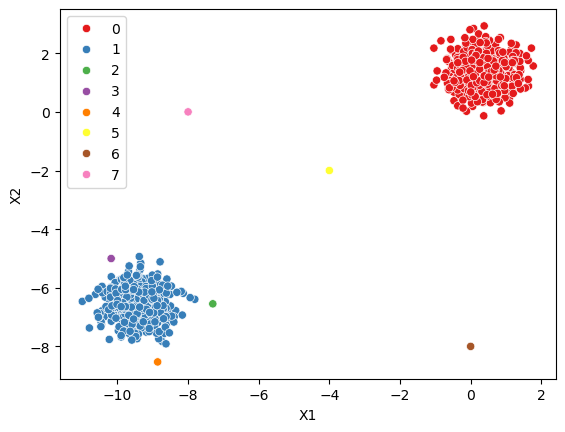

In [33]:
dbscan = DBSCAN(min_samples=1)
display_categories(dbscan,two_blobs_outliers)

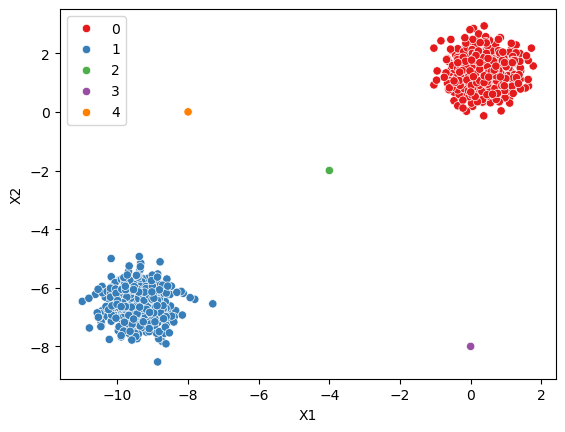

In [34]:
dbscan = DBSCAN(eps=0.75,min_samples=1)
display_categories(dbscan,two_blobs_outliers)

----